# Classification Boundary
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2024-08-18
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---



## Instruction



1.   Download and run in your local Jupyter Notebook

or

2.   Connect to a local runtime (Jupyter Notebook URL with token)



## Install Draw Data (if needed)

In [595]:
!pip install drawdata


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Code

In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression


In [597]:
from drawdata import draw_line, draw_scatter, draw_histogram


In [598]:
classifiers = [
    ( "Logistic Regression", LogisticRegression() ),


    ( "KNN (5)", KNeighborsClassifier(5) ),
    ( "KNN (11)", KNeighborsClassifier(11) ),

    ( "Naive Bayes", GaussianNB() ),

    ( "SVM (Linear)", SVC(kernel="linear", C=0.025) ),
    ( "SVM (RBF)", SVC(kernel='rbf', gamma=2, C=1) ),


    ( "Decision Tree (2)", DecisionTreeClassifier(max_depth=2) ),
    ( "Decision Tree (3)", DecisionTreeClassifier(max_depth=3) ),
    ( "Random Forest (10)", RandomForestClassifier(max_depth=3, n_estimators=10, max_features=2) ),


    ( "Neural Net (10,)", MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=1, max_iter=5000) ),
    ( "Neural Net (20,)", MLPClassifier(hidden_layer_sizes=(20,), activation='relu', alpha=1, max_iter=5000) ),
    ( "Neural Net (10, 10)", MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=1, max_iter=5000) ),
    ( "Neural Net (20, 20)", MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', alpha=1, max_iter=5000) ),
    ( "Neural Net (20, 20, 20)", MLPClassifier(hidden_layer_sizes=(20, 20, 20), activation='relu', alpha=1, max_iter=5000) ),
    #( "Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0)) ),

    #( "AdaBoost", AdaBoostClassifier() ),
    #( "QDA", QuadraticDiscriminantAnalysis() ),
]

In [599]:
COLORS = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}

## Design your data here !


*   Then, click the "copy csv"



In [600]:
draw_scatter()

## Load the data from Clipboard

*   If error, check that it must be the local runtime




In [601]:
df = pd.read_clipboard(sep=",")
df.columns = ['x1', 'x2', 'y']


# preprocess dataset, split into training and test part
X = df[['x1', 'x2']]
y = df['y']


In [602]:
# df

## Classifer Boundary Visualization

*********************************
train-test
*********************************


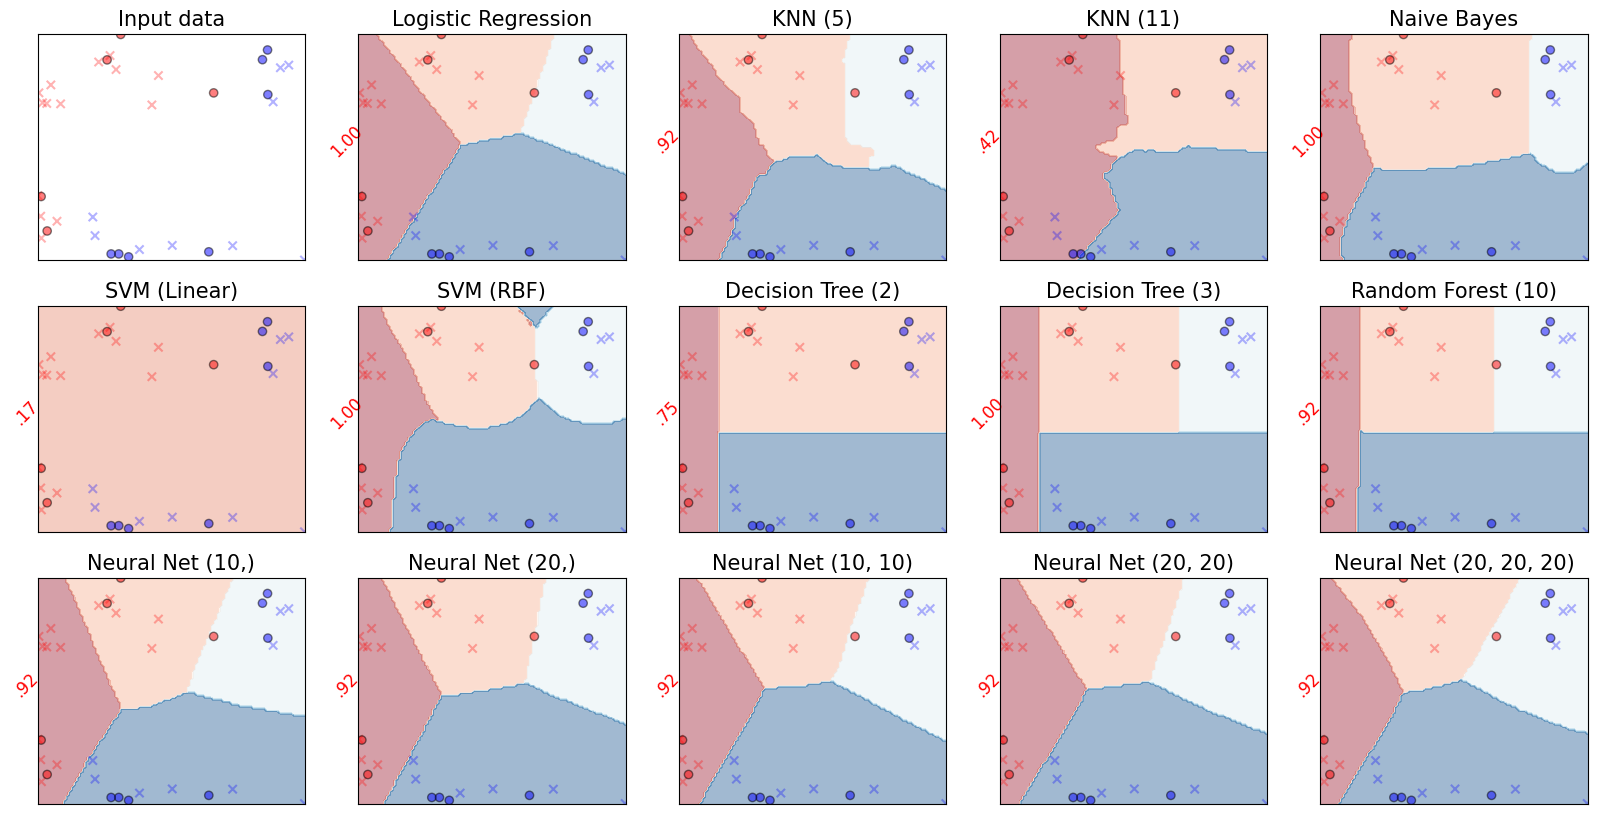

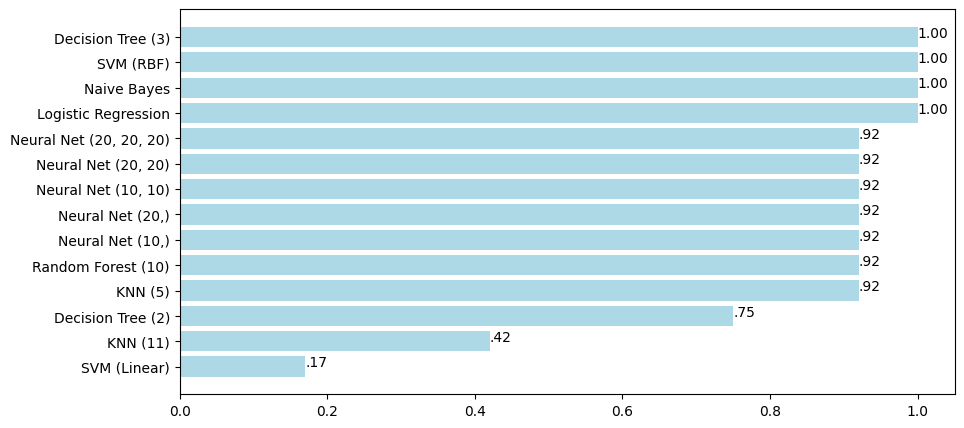

*********************************
all
*********************************


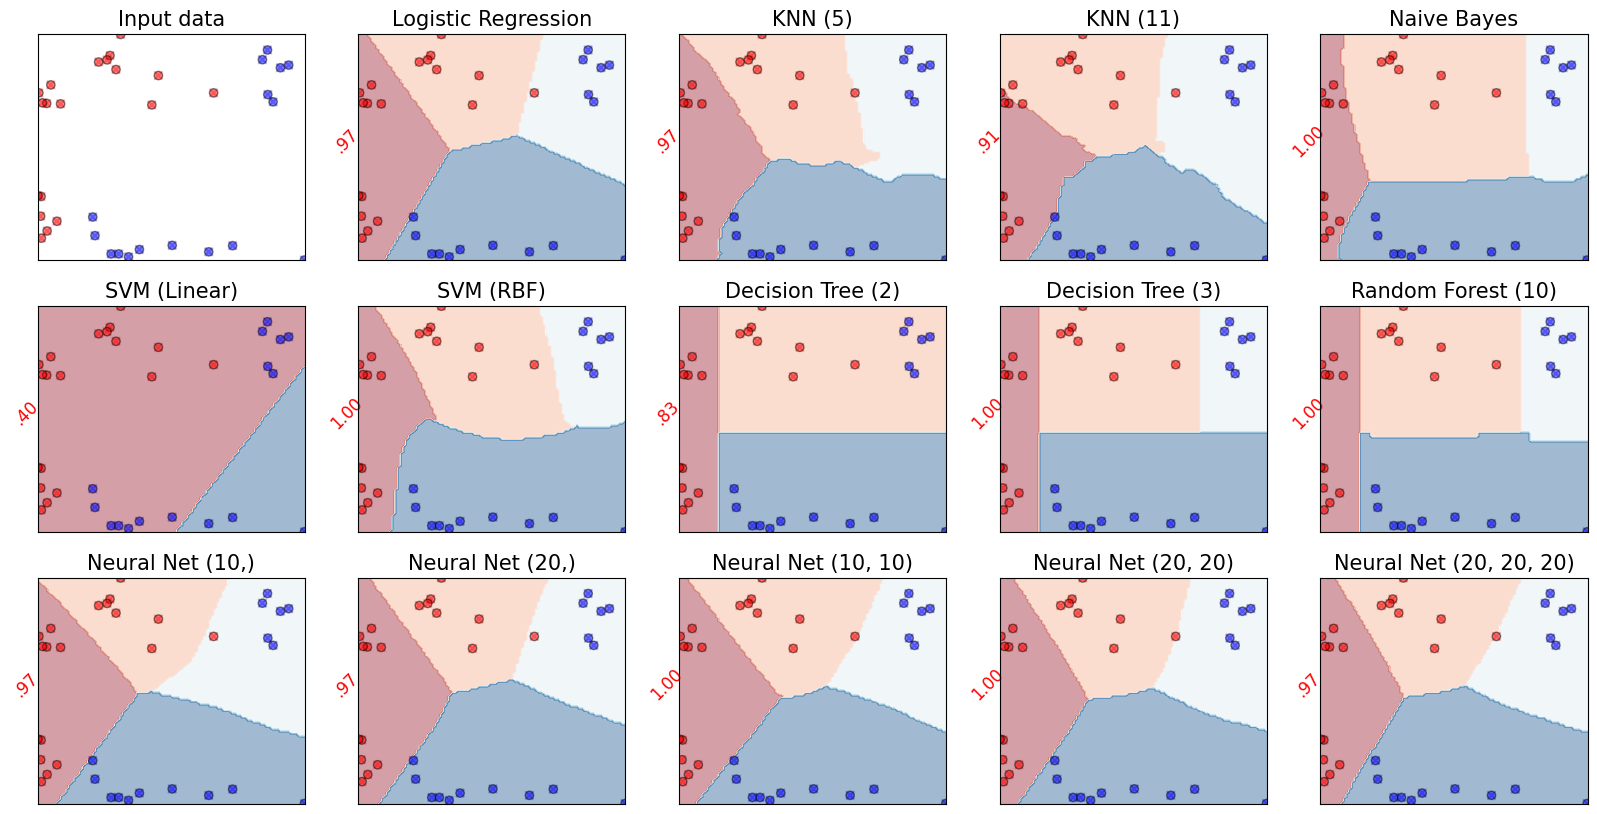

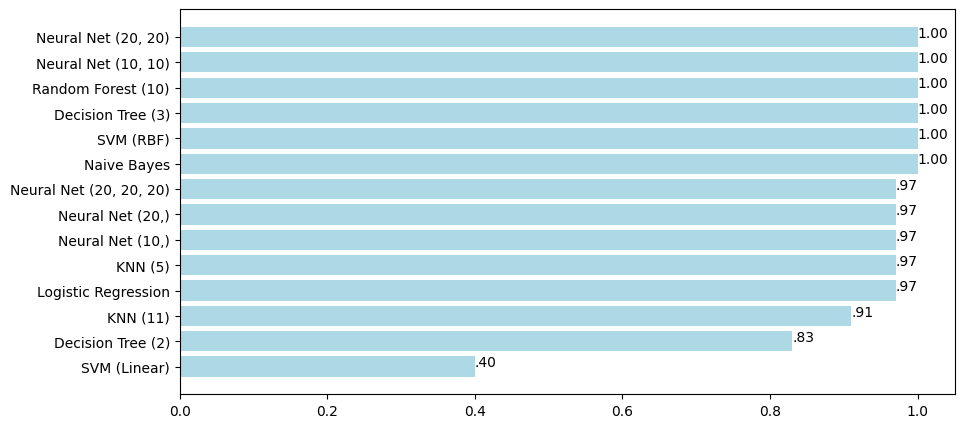

In [603]:
for ITER in ['train-test', 'all']:
    print('*********************************')
    print(ITER)
    print('*********************************')

    if ITER=='all':
        X_train = X
        X_test = X
        y_train = y
        y_test = y
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42
        )

    MODEL_RES = []

    figure = plt.figure(figsize=(20, 10))
    i = 1



    x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
    y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(3, 5, i)
    ax.set_title("Input data", fontsize=15)
    # Plot the training points
    ax.scatter(
        X_train['x1'], X_train['x2'], c=y_train.apply(lambda x: COLORS[x]),
        cmap=cm_bright, marker='x', alpha=0.3
    )
    # Plot the testing points
    ax.scatter(
        X_test['x1'], X_test['x2'], c=y_test.apply(lambda x: COLORS[x]),
        cmap=cm_bright, alpha=0.5, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    # iterate over classifiers
    for name, clf in classifiers:
        ax = plt.subplot(3, 5, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.4, ax=ax, eps=0.5
        )

        # Plot the training points

        ax.scatter(
            X_train['x1'], X_train['x2'], c=y_train.apply(lambda x: COLORS[x]),
            cmap=cm_bright, marker='x', alpha=0.3
        )

        # Plot the testing points
        ax.scatter(
            X_test['x1'],
            X_test['x2'],
            c=y_test.apply(lambda x: COLORS[x]),
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.5,
        )

        #ax.set_ylabel(("%.2f" % score).lstrip("0"), loc='top', fontsize=12, c='red',rotation=0)
        ax.set_ylabel(("%.2f" % score).lstrip("0"), fontsize=12, c='red', rotation=45)
        ax.set_xlabel('')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name,  fontsize=15),
        #ax.margins(1)


        i += 1

        MODEL_RES.append((name, round(score,2)))

    plt.show()

    ### Show performance
    plt.figure(figsize=(10, 5))
    MODEL_RES.sort(key=lambda x: x[1], reverse=False)
    names = list(zip(*MODEL_RES))[0]
    scores = list(zip(*MODEL_RES))[1]
    plt.barh(names, scores, align='center', color='lightblue')
    for index, score in enumerate(scores):
        plt.text(score, index,
                str(("%.2f" % score).lstrip("0")))
    plt.show()


---
https://rathachai.creatier.pro/

## つづく